In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [3]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))

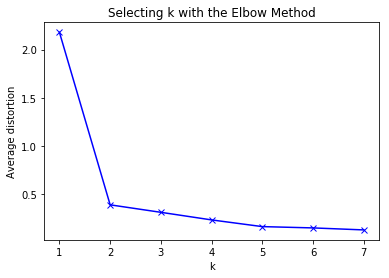

In [4]:
X = np.hstack((cluster1, cluster2)).T
#X = np.vstack((x, y)).T
K = range(1, 8)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()



In [5]:
?kmeans.n_clusters

In [5]:
def read(obj,key):
    collect = list()
    for k in obj:
        v = obj[k]
        if isinstance(v,dict):
            collect.extend(read(v,k))
        elif isinstance(v,list):
            if key=='':
                collect.extend(readList(v,k))
            else:
                collect.extend(readList(v,key+"."+k))
        else:
            if key=='':
                collect.append({k:v})
            else:
                collect.append({str(key)+"."+k:v})
    return collect
    
def readList(obj,key):
    collect = list()
    for index,item in enumerate(obj):
        for k in item:
            v = item[k]
            if isinstance(v,dict):
                collect.extend(read(v,key+"["+str(index)+"]"))
            elif isinstance(v,list):
                collect.extend(readList(v,key+"["+str(index)+"]"))
            else:
                collect.append({key+"["+str(index)+"]"+"."+k:v})
    return collect

In [6]:
import json

jsonStr = '{"num":1,"boo":true,"obj":{"sex":"boy","age":20},"result":[{"name":"saas","leverl":[{"name":"english","mark":99}],"id":"336efba7-259d-4057-ae1e-679e81419cd7","module":"life"}]}'

ojt = json.loads(jsonStr)
print(read(ojt,''))

#输出结果
[{u'num': 1}, {u'obj.age': 20}, {u'obj.sex': u'boy'}, {u'[0].module': u'life'}, {u'[0].name': u'saas'}, {u'[0][0].name': u'english'}, {u'[0][0].mark': 99}, {u'[0].id': u'336efba7-259d-4057-ae1e-679e81419cd7'}, {u'boo': True}]


[{'num': 1}, {'boo': True}, {'obj.sex': 'boy'}, {'obj.age': 20}, {'result[0].name': 'saas'}, {'result[0][0].name': 'english'}, {'result[0][0].mark': 99}, {'result[0].id': '336efba7-259d-4057-ae1e-679e81419cd7'}, {'result[0].module': 'life'}]


[{'num': 1},
 {'obj.age': 20},
 {'obj.sex': 'boy'},
 {'[0].module': 'life'},
 {'[0].name': 'saas'},
 {'[0][0].name': 'english'},
 {'[0][0].mark': 99},
 {'[0].id': '336efba7-259d-4057-ae1e-679e81419cd7'},
 {'boo': True}]

In [6]:
import pickle

In [8]:
filename = 'training_model.sav'

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, )

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
df.set_index('ID').T.to_dict('list')